In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [36]:
data_cg1 = np.load('../../../deterministic/224x32/data_at_more_obs_points_config1/coarse_grained_vel_temp_data_t=25.0_to_t=35.0_grid_32_more_obs_config1.npz')
data_cg2 = np.load('../../../deterministic/224x32/data_at_more_obs_points_config1/coarse_grained_vel_temp_data_t=35.0_to_t=45.0_grid_32_more_obs_config1.npz')


In [37]:
ua_truth_t1 = data_cg1['ua_truth'] # t25 to t35
ua_truth_t2 = data_cg2['ua_truth'] # t35 to t45
Ta_truth_t1 = data_cg1['Ta_truth'] # t25 to t35
Ta_truth_t2 = data_cg2['Ta_truth'] # t35 to t45

In [38]:
ua_truth_t1.shape, ua_truth_t2.shape

((10, 84, 2), (11, 84, 2))

In [39]:
gridpoints = data_cg1['gridpoints']
print(f'gridpoints: {gridpoints}')

gridpoints: [[0.   0.25]
 [0.25 0.25]
 [0.5  0.25]
 [0.75 0.25]
 [1.   0.25]
 [1.25 0.25]
 [1.5  0.25]
 [1.75 0.25]
 [2.   0.25]
 [2.25 0.25]
 [2.5  0.25]
 [2.75 0.25]
 [3.   0.25]
 [3.25 0.25]
 [3.5  0.25]
 [3.75 0.25]
 [4.   0.25]
 [4.25 0.25]
 [4.5  0.25]
 [4.75 0.25]
 [5.   0.25]
 [5.25 0.25]
 [5.5  0.25]
 [5.75 0.25]
 [6.   0.25]
 [6.25 0.25]
 [6.5  0.25]
 [6.75 0.25]
 [0.   0.5 ]
 [0.25 0.5 ]
 [0.5  0.5 ]
 [0.75 0.5 ]
 [1.   0.5 ]
 [1.25 0.5 ]
 [1.5  0.5 ]
 [1.75 0.5 ]
 [2.   0.5 ]
 [2.25 0.5 ]
 [2.5  0.5 ]
 [2.75 0.5 ]
 [3.   0.5 ]
 [3.25 0.5 ]
 [3.5  0.5 ]
 [3.75 0.5 ]
 [4.   0.5 ]
 [4.25 0.5 ]
 [4.5  0.5 ]
 [4.75 0.5 ]
 [5.   0.5 ]
 [5.25 0.5 ]
 [5.5  0.5 ]
 [5.75 0.5 ]
 [6.   0.5 ]
 [6.25 0.5 ]
 [6.5  0.5 ]
 [6.75 0.5 ]
 [0.   0.75]
 [0.25 0.75]
 [0.5  0.75]
 [0.75 0.75]
 [1.   0.75]
 [1.25 0.75]
 [1.5  0.75]
 [1.75 0.75]
 [2.   0.75]
 [2.25 0.75]
 [2.5  0.75]
 [2.75 0.75]
 [3.   0.75]
 [3.25 0.75]
 [3.5  0.75]
 [3.75 0.75]
 [4.   0.75]
 [4.25 0.75]
 [4.5  0.75]
 [4.75 0.75]


In [40]:
ua_truth = np.concatenate((ua_truth_t1, ua_truth_t2), axis=0)
Ta_truth = np.concatenate((Ta_truth_t1, Ta_truth_t2), axis=0)

In [41]:
ua_truth.shape, Ta_truth.shape

((21, 84, 2), (21, 84))

In [42]:
n_tsteps = 21 
n_obs_points = gridpoints.shape[0]
n_stoch = 50

In [43]:
ua_truth[:,3,0].shape, Ta_truth[:,3].shape


((21,), (21,))

In [44]:
vel_x_mean_mat = np.zeros((n_tsteps,n_obs_points))
vel_x_std_mat = np.zeros((n_tsteps,n_obs_points))

vel_y_mean_mat = np.zeros((n_tsteps,n_obs_points))
vel_y_std_mat = np.zeros((n_tsteps,n_obs_points))

temp_data_mean_mat = np.zeros((n_tsteps,n_obs_points))
temp_data_std_mat = np.zeros((n_tsteps,n_obs_points))

vel_x_rmse_mat = np.zeros((n_tsteps,n_obs_points))
vel_y_rmse_mat = np.zeros((n_tsteps,n_obs_points))
temp_rmse_mat = np.zeros((n_tsteps,n_obs_points))

for l in range(n_obs_points):
    vel_x_data_stoch_mat = np.zeros((n_tsteps,n_stoch)) # at a location
    vel_y_data_stoch_mat = np.zeros((n_tsteps,n_stoch))
    temp_data_stoch_mat = np.zeros((n_tsteps,n_stoch)) # at a location

    for k in range(n_stoch):
        data_stoch = np.load('../data_stoch_more_obs/vel_temp_data_m_obs_particle_'+str(k+1)+'_var_99_grid_32_t25_onwards_OU_same_ic.npz')

        vel_data_stoch = data_stoch['ua_data_sto']  
        vel_x_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 0]
        vel_y_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 1]

        temp_data_stoch = data_stoch['Ta_data_sto'] 
        temp_data_stoch_mat[:,k] = temp_data_stoch[:n_tsteps,l]


    vel_x_rmse = np.sqrt(np.mean(np.square(vel_x_data_stoch_mat - ua_truth[:n_tsteps,l,0].reshape((-1,1))), axis = 1, keepdims=True))
    vel_y_rmse = np.sqrt(np.mean(np.square(vel_y_data_stoch_mat - ua_truth[:n_tsteps,l,1].reshape((-1,1))), axis = 1, keepdims=True))
    temp_rmse = np.sqrt(np.mean(np.square(temp_data_stoch_mat - Ta_truth[:n_tsteps,l].reshape((-1,1))), axis = 1, keepdims=True))

    vel_x_data_mean = np.mean(vel_x_data_stoch_mat, axis = 1, keepdims=True)
    vel_x_data_std = np.std(vel_x_data_stoch_mat, axis = 1, keepdims=True)

    vel_y_data_mean = np.mean(vel_y_data_stoch_mat, axis = 1, keepdims=True)
    vel_y_data_std = np.std(vel_y_data_stoch_mat, axis = 1, keepdims=True)

    temp_data_mean = np.mean(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_data_std = np.std(temp_data_stoch_mat, axis = 1, keepdims=True)

    vel_x_mean_mat[:,l] = vel_x_data_mean[:,0]
    vel_x_std_mat[:,l] = vel_x_data_std[:,0]

    vel_y_mean_mat[:,l] = vel_y_data_mean[:,0]
    vel_y_std_mat[:,l] = vel_y_data_std[:,0]

    temp_data_mean_mat[:,l] = temp_data_mean[:,0]
    temp_data_std_mat[:,l] = temp_data_std[:,0]

    vel_x_rmse_mat[:,l] =  vel_x_rmse[:,0]
    vel_y_rmse_mat[:,l] =  vel_y_rmse[:,0]
    temp_rmse_mat[:,l] = temp_rmse[:,0]

ux_spread = vel_x_std_mat
uy_spread = vel_y_std_mat
temp_spread = temp_data_std_mat

ux_bias = np.abs(vel_x_mean_mat - ua_truth[:n_tsteps,:,0]) # absolute bias
uy_bias = np.abs(vel_y_mean_mat - ua_truth[:n_tsteps,:,1])
temp_bias = np.abs(temp_data_mean_mat - Ta_truth[:n_tsteps,:])

ux_rmse = vel_x_rmse_mat
uy_rmse = vel_y_rmse_mat
temp_rmse = temp_rmse_mat

# Plotting RMSE, and spread

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

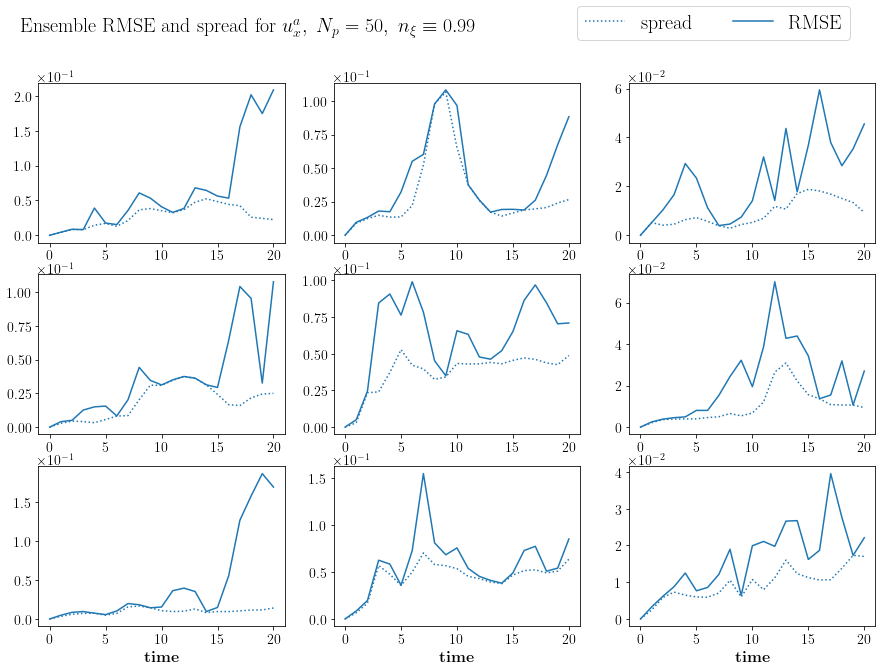

In [45]:
fig, ax = plt.subplots(3,3, figsize=(15, 10))
obs_p = [8, 14, 20, 36, 42, 50, 64, 70, 78] # 14, 42, 70, 50, 78, 64 gives better results
n = 0
for i in [2,1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(ux_spread[:,obs_p[n]], color = 'tab:blue', linestyle='dotted', label='spread')
        ax[i,j].plot(ux_rmse[:,obs_p[n]], color = 'tab:blue', label='RMSE')
        # ax[i,j].plot(ux_bias[:,obs_p[n]], color = 'tab:blue', linestyle='dashed', label='bias')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        ax[i,j].set_xticks(np.arange(0,21,5))
        n += 1

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.75, 1), ncol=2)
fig.suptitle(r'Ensemble RMSE and spread for $u_x^a, \ N_p = 50, \ n_{\xi} \equiv 0.99$', x = 0.32, y = .97)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

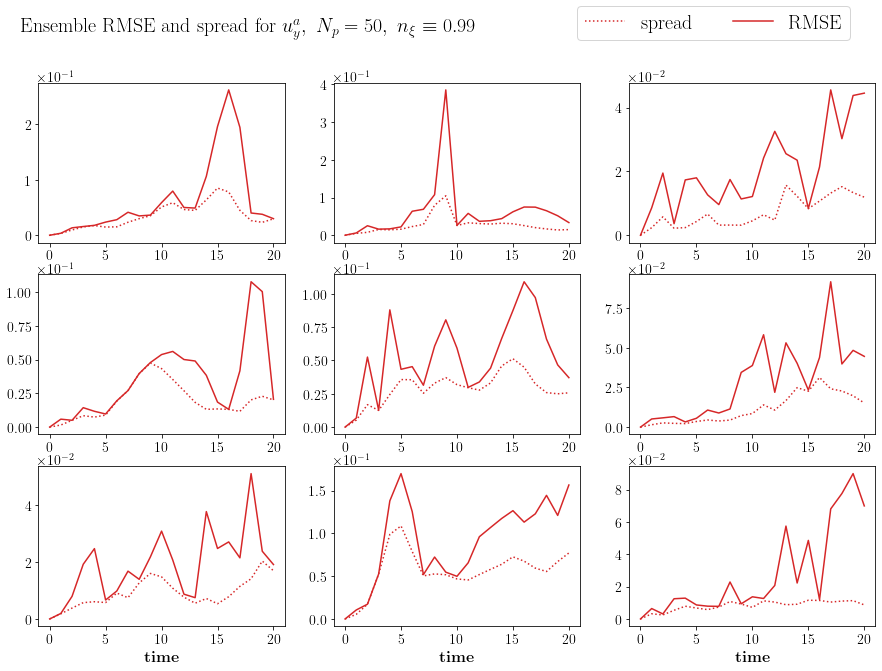

In [46]:
fig, ax = plt.subplots(3,3, figsize=(15, 10))
n = 0
for i in [2,1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(uy_spread[:,obs_p[n]], color = 'tab:red', linestyle='dotted', label='spread')
        ax[i,j].plot(uy_rmse[:,obs_p[n]], color = 'tab:red', label='RMSE')
        # ax[i,j].plot(uy_bias[:,obs_p[n]], color = 'tab:red', linestyle='dashed', label='bias')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        ax[i,j].set_xticks(np.arange(0,21,5))
        n += 1

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.75, 1), ncol=2)
fig.suptitle(r'Ensemble RMSE and spread for $u_y^a, \ N_p = 50, \ n_{\xi} \equiv 0.99$', x = 0.32, y = .97)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

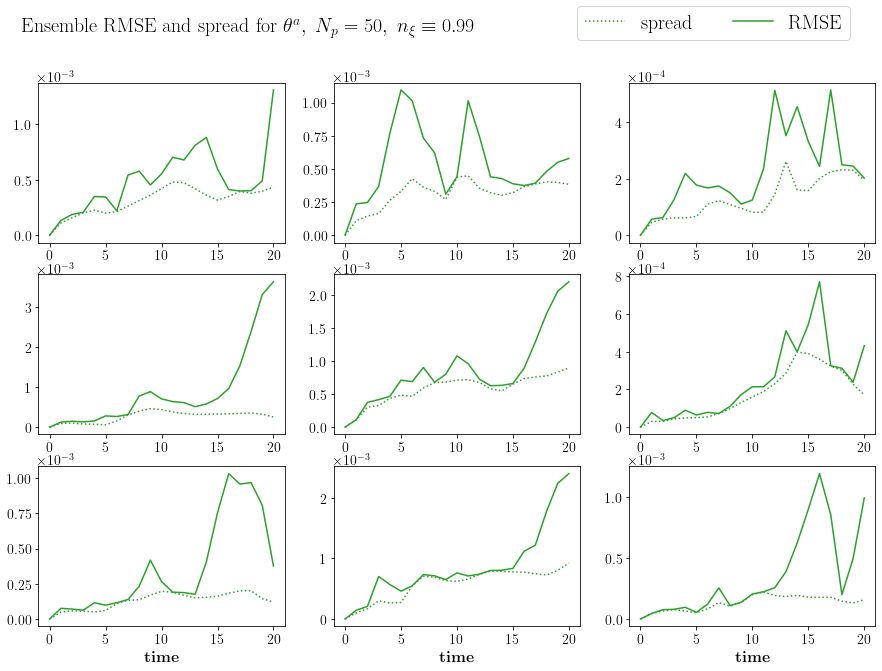

In [47]:
fig, ax = plt.subplots(3,3, figsize=(15, 10))
n = 0
for i in [2,1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(temp_spread[:,obs_p[n]], color = 'tab:green', linestyle='dotted', label='spread')
        ax[i,j].plot(temp_rmse[:,obs_p[n]], color = 'tab:green', label='RMSE')
        # ax[i,j].plot(temp_bias[:,obs_p[n]], color = 'tab:green', linestyle='dashed', label='bias')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        ax[i,j].set_xticks(np.arange(0,21,5))
        n += 1

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.75, 1), ncol=2)
fig.suptitle(r'Ensemble RMSE and spread for $\theta^a, \ N_p = 50, \ n_{\xi} \equiv 0.99$', x = 0.32, y = .97)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')

locations corresponding to $n = 14, 42, 70, 50, 78, 64$  gives very good results ! We therefore plot results for these locations again. 

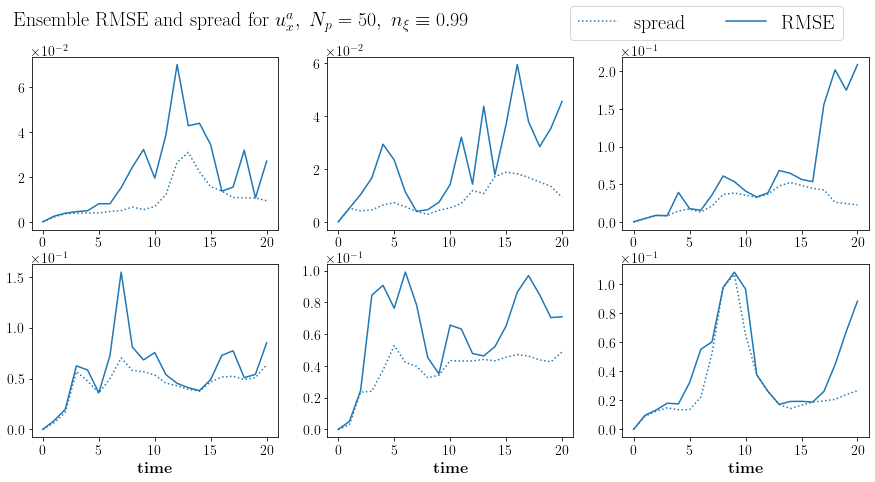

In [51]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
obs_p = [14, 42, 70, 50, 78, 64]
n = 0
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(ux_spread[:,obs_p[n]], color = 'tab:blue', linestyle='dotted', label='spread')
        ax[i,j].plot(ux_rmse[:,obs_p[n]], color = 'tab:blue', label='RMSE')
        # ax[i,j].plot(ux_bias[:,obs_p[n]], color = 'tab:blue', linestyle='dashed', label='bias')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        ax[i,j].set_xticks(np.arange(0,21,5))
        n += 1

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.75, 1), ncol=2)
fig.suptitle(r'Ensemble RMSE and spread for $u_x^a, \ N_p = 50, \ n_{\xi} \equiv 0.99$', x = 0.32, y = .97)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
plt.savefig('../plots/ou_same_ic/spread_rmse_res_32_atm_ux_var_99_part_50_t25_onwards.pdf',bbox_inches='tight')

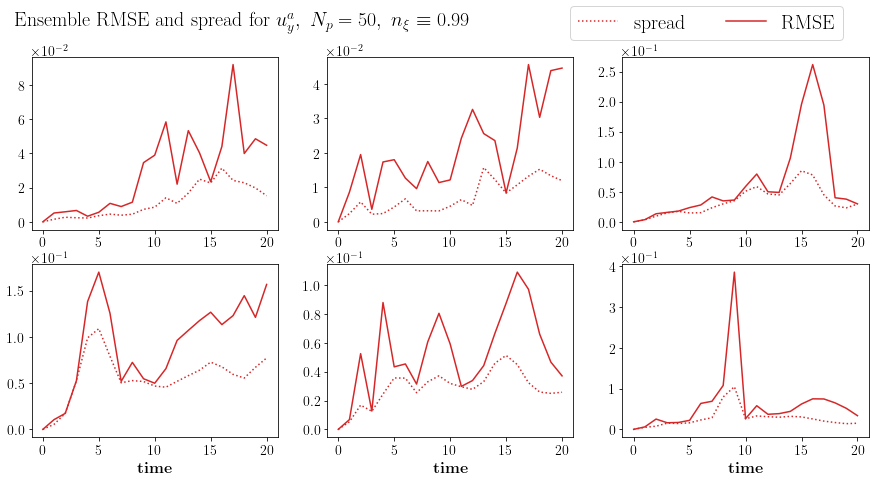

In [52]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(uy_spread[:,obs_p[n]], color = 'tab:red', linestyle='dotted', label='spread')
        ax[i,j].plot(uy_rmse[:,obs_p[n]], color = 'tab:red', label='RMSE')
        # ax[i,j].plot(uy_bias[:,obs_p[n]], color = 'tab:red', linestyle='dashed', label='bias')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        ax[i,j].set_xticks(np.arange(0,21,5))
        n += 1

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.75, 1), ncol=2)
fig.suptitle(r'Ensemble RMSE and spread for $u_y^a, \ N_p = 50, \ n_{\xi} \equiv 0.99$', x = 0.32, y = .97)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
plt.savefig('../plots/ou_same_ic/spread_rmse_res_32_atm_uy_var_99_part_50_t25_onwards.pdf',bbox_inches='tight')

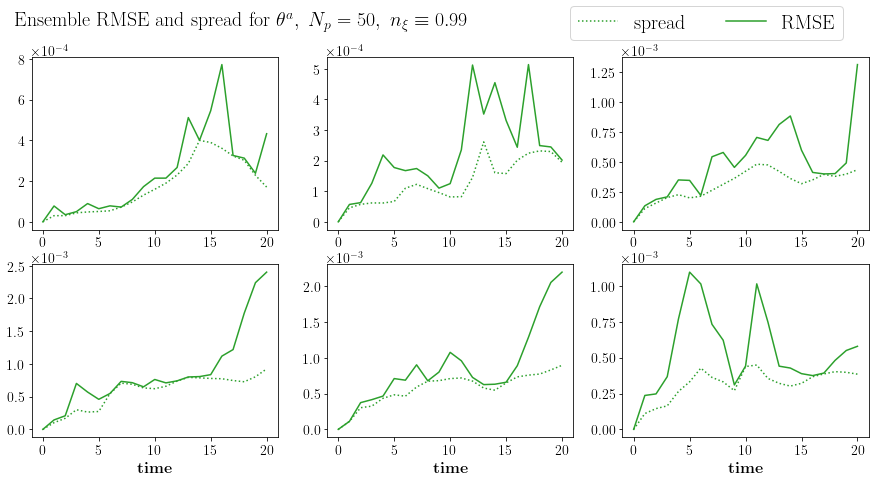

In [53]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(temp_spread[:,obs_p[n]], color = 'tab:green', linestyle='dotted', label='spread')
        ax[i,j].plot(temp_rmse[:,obs_p[n]], color = 'tab:green', label='RMSE')
        # ax[i,j].plot(temp_bias[:,obs_p[n]], color = 'tab:green', linestyle='dashed', label='bias')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        ax[i,j].set_xticks(np.arange(0,21,5))
        n += 1

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.75, 1), ncol=2)
fig.suptitle(r'Ensemble RMSE and spread for $\theta^a, \ N_p = 50, \ n_{\xi} \equiv 0.99$', x = 0.32, y = .97)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
plt.savefig('../plots/ou_same_ic/spread_rmse_res_32_atm_temp_var_99_part_50_t25_onwards.pdf',bbox_inches='tight')